# **Import Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# **Import Dataset**

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
r = pd.read_csv('/content/sample_data/ratings.csv')
b = pd.read_csv('/content/sample_data/books_enriched.csv')

#**Data Understanding**

### **1.Rating**

In [ ]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [ ]:
r.shape

(5976479, 3)

In [ ]:
for col in r.columns:
    print(f"Number of {col} is {r[col].nunique()}")

Number of user_id is 53424
Number of book_id is 10000
Number of rating is 5


There are 5,976,479 ratings given by 53,424 people on 10,000 books.

In [ ]:
b.shape

(10000, 30)

In [ ]:
b.head(3).T

,0,1,2
Unnamed: 0,0,1,2
index,0,1,2
authors,['Suzanne Collins'],"['J.K. Rowling', 'Mary GrandPré']",['Stephenie Meyer']
average_rating,4.34,4.44,3.57
best_book_id,2767052,3,41865
book_id,1,2,3
books_count,272,491,226
description,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Harry Potter's life is miserable. His parents ...,About three things I was absolutely positive.\...
genres,"['young-adult', 'fiction', 'fantasy', 'science...","['fantasy', 'fiction', 'young-adult', 'classics']","['young-adult', 'fantasy', 'romance', 'fiction..."
goodreads_book_id,2767052,3,41865


# **Statistical Summary**

In [ ]:
nums = b.select_dtypes(include=[np.number]).columns
cats = b.select_dtypes(exclude=[np.number]).columns

In [ ]:
b[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
index,10000.00,4526.32,2567.92,0.00,2351.75,4567.50,6661.25,9999.00
average_rating,10000.00,4.00,0.25,2.47,3.85,4.02,4.18,4.82
best_book_id,10000.00,5471213.58,7827329.89,1.00,47911.75,425123.50,9636112.50,35534230.00
book_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
books_count,10000.00,75.71,170.47,1.00,23.00,40.00,67.00,3455.00
goodreads_book_id,10000.00,5264696.51,7575461.86,1.00,46275.75,394965.50,9382225.25,33288638.00
isbn13,9415.00,9755044298883.46,442861920665.57,195170342.00,9780316192995.00,9780451528640.00,9780830777175.00,9790007672390.00
original_publication_year,9979.00,1981.99,152.58,-1750.00,1990.00,2004.00,2011.00,2017.00
pages,9927.00,359.42,216.95,0.00,250.00,336.00,424.00,5216.00


In [ ]:
b[cats].describe().T

,count,unique,top,freq
authors,10000,5057,['Stephen King'],58
description,9943,9772,The first in a spectacularly genre-mashing adv...,4
genres,10000,4351,"['fantasy', 'fiction']",152
image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/11...,3332
isbn,9300,9300,439023483,1
language_code,10000,41,eng,9680
original_title,9415,9274,,5
publishDate,9992,4679,"(None, None, None)",75
small_image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/50...,3332
title,10000,9964,Selected Poems,4


In [ ]:
not_unique_nums = ['average_rating', 'books_count', 'original_publication_year', 'pages',
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count',
                    'work_ratings_count', 'work_text_reviews_count']

# **Univariate Analysis**

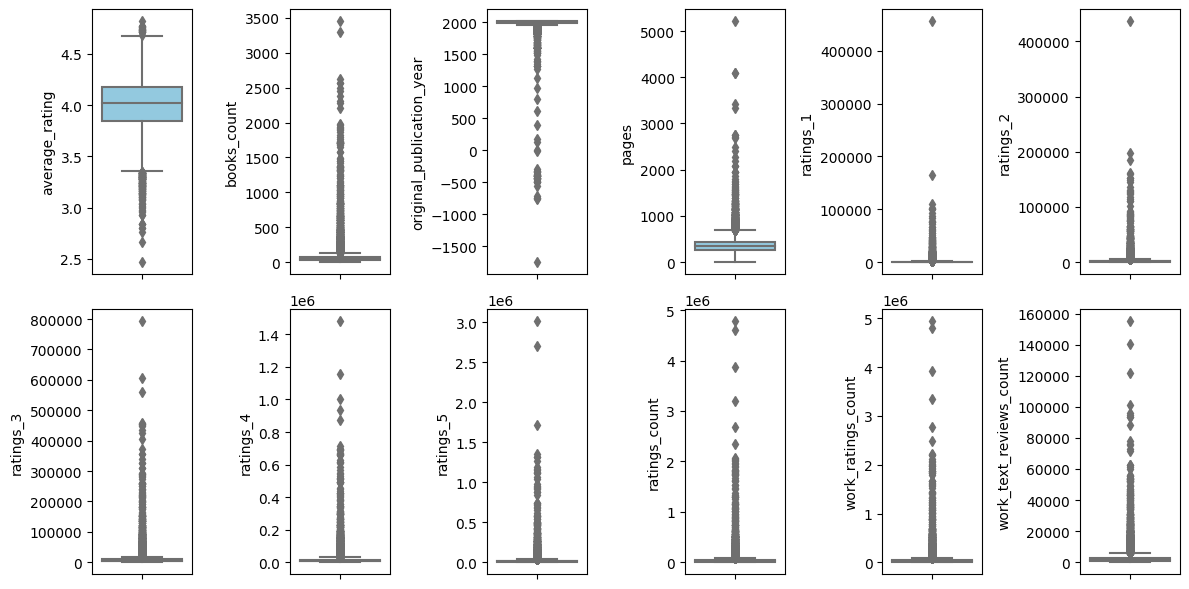

In [ ]:
plt.figure(figsize=(12,6))

features=not_unique_nums
for i in range(0,len(features)):
  plt.subplot(2,6,i+1)
  sns.boxplot(y=b[features[i]],color='skyblue')
  plt.tight_layout()

# **Bivariate Analysis**

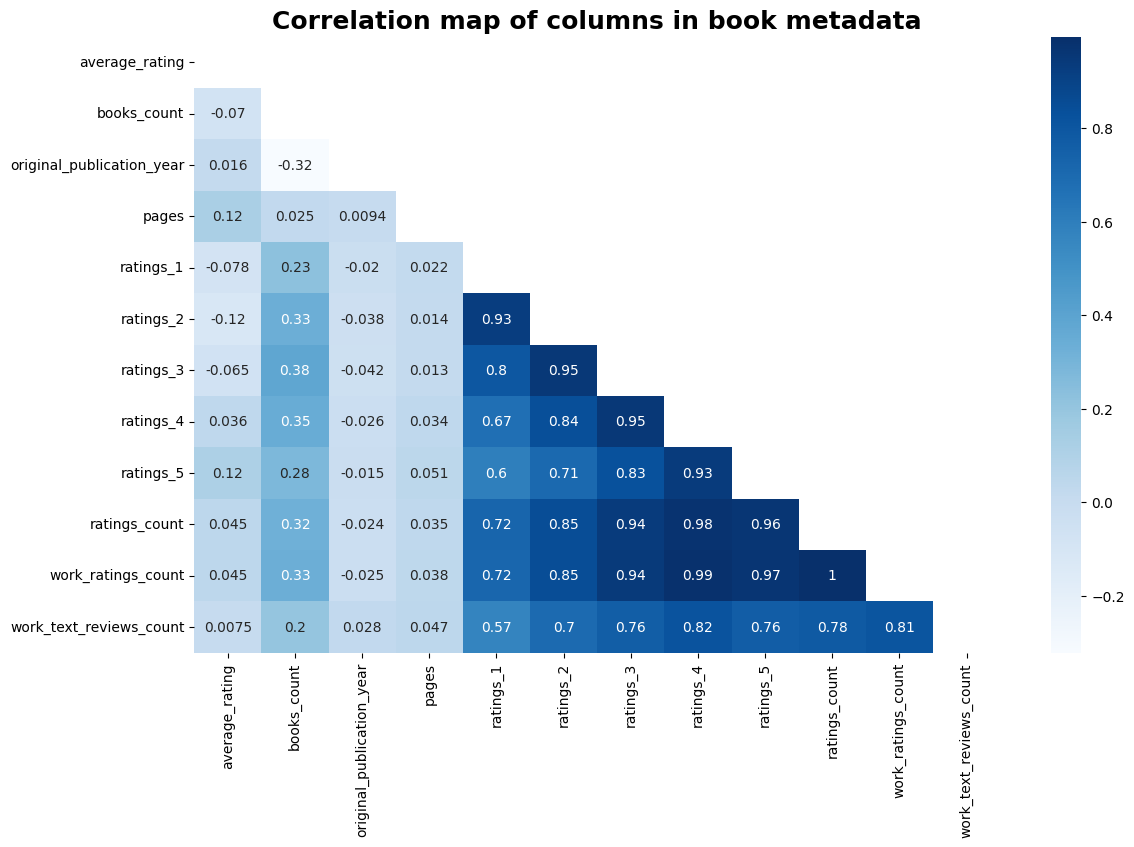

In [ ]:
corr=b[not_unique_nums].corr()
upper_triangle=np.triu(corr)
plt.figure(figsize=(13,8))
sns.heatmap(corr,cmap='Blues',annot=True,mask=upper_triangle)
plt.title('Correlation map of columns in book metadata',weight='bold',fontsize=18)
plt.show()

# **Data Preprocessing**

### **Missing Values and Duplicated Rows**

In [ ]:
dataset=[r,b]
for cdata in dataset:
  print(cdata.isnull().values.any())

False
True


In [ ]:
for data in dataset:
    print(data.duplicated().values.any())

False
False


In [ ]:
r.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [ ]:
r=r.dropna()

In [ ]:
r

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [ ]:
books=b.copy()

In [ ]:
percent_missing=books.isnull().sum()*100/len(books)

In [ ]:
percent_missing

Unnamed: 0                  0.00
index                       0.00
authors                     0.00
average_rating              0.00
best_book_id                0.00
book_id                     0.00
books_count                 0.00
description                 0.57
genres                      0.00
goodreads_book_id           0.00
image_url                   0.00
isbn                        7.00
isbn13                      5.85
language_code               0.00
original_publication_year   0.21
original_title              5.85
pages                       0.73
publishDate                 0.08
ratings_1                   0.00
ratings_2                   0.00
ratings_3                   0.00
ratings_4                   0.00
ratings_5                   0.00
ratings_count               0.00
small_image_url             0.00
title                       0.00
work_id                     0.00
work_ratings_count          0.00
work_text_reviews_count     0.00
authors_2                   0.00
dtype: flo

In [ ]:
percent_missing=books.isnull().sum()*100/len(books)
missing_value=(pd.DataFrame({'percent_missing':percent_missing})).sort_values(by=['percent_missing'], ascending=False)
missing_value[missing_value['percent_missing']>0]

,percent_missing
isbn,7.00
original_title,5.85
isbn13,5.85
pages,0.73
description,0.57
original_publication_year,0.21
publishDate,0.08


In [ ]:
#compare original_publication_year and publishDate when original_publication_year is null
books[books['original_publication_year'].isnull()][['original_publication_year', 'publishDate']]

,original_publication_year,publishDate
198,NaN,October 28th 2008
3249,NaN,February 7th 2006
3881,NaN,September 29th 2009
4252,NaN,November 10th 2010
4303,NaN,June 23rd 2009
4392,NaN,April 8th 2013
5001,NaN,November 9th 2004
5208,NaN,December 6th 2010
5648,NaN,October 11th 2006
7163,NaN,November 25th 2004


In [ ]:
books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)

In [ ]:
books['publishDate']

0           09/14/08
1           11/01/03
2           09/06/06
3           05/23/06
4           09/28/04
            ...     
9995      6, 7, 2005
9996     1, 19, 2016
9997     10, 1, 2000
9998    10, 19, 2010
9999     5, 16, 2000
Name: publishDate, Length: 10000, dtype: object

In [ ]:
books['publishDate'] = books['publishDate'].str.extract('(\d{4})$').fillna('')

In [ ]:
books['publishDate']

0           
1           
2           
3           
4           
        ... 
9995    2005
9996    2016
9997    2000
9998    2010
9999    2000
Name: publishDate, Length: 10000, dtype: object

In [ ]:
books['original_publication_year'] = books['original_publication_year'].fillna(books['publishDate'])

In [ ]:
books['description'] = books['description'].fillna(books['title'])

In [ ]:
books['pages'] = books['pages'].fillna(books['pages'].median())

In [ ]:
books = books.drop(['isbn', 'original_title', 'isbn13', 'publishDate'], axis=1)

In [ ]:
books.isnull().values.any()

False

# **Feature Engineering**

In [ ]:
cols_to_keep = ['book_id', 'title', 'authors', 'original_publication_year', 'pages', 'description', 'genres', 'average_rating', 'ratings_count', 'books_count']

In [ ]:
books=books[cols_to_keep]

In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(books.head(5))

,book_id,title,authors,original_publication_year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008.00,374.00,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.","['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.34,4780653,272
1,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997.00,309.00,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.","['fantasy', 'fiction', 'young-adult', 'classics']",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005.00,501.00,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.","['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.57,3866839,226
3,4,To Kill a Mockingbird,['Harper Lee'],1960.00,324.00,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American l

In [ ]:
col_trans = ['authors', 'genres', 'description']
for col in col_trans:
    books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True)
books['description'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]" : ""}, regex=True, inplace=True)
books['description'] = books['description'].str.lower()

In [ ]:
#rename column and change year, pages, and book_count to integer
books.rename(columns = {'original_publication_year':'year'}, inplace = True)
books[['year', 'pages', 'books_count']] = books[['year', 'pages', 'books_count']].astype(int)

In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(books.sample(10))

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
3605,3923,A Book of Five Rings: The Classic Guide to Strategy,"Miyamoto Musashi, Victor Harris",1645,192,written over three centuries ago by a samurai warrior the book has been hailed as a limitless source of psychological insight for businessmenor anyone who relies on strategy and tactics for outwitting the competition,"philosophy, nonfiction, classics, history, business",4.09,19246,77
2232,2385,"The Dragonbone Chair (Memory, Sorrow, and Thorn, #1)",Tad Williams,1988,672,a war fueled by the powers of dark sorcery is about to engulf the peaceful land of osten ardfor prester john the high king lies dying and with his death the storm king the undead ruler of the elflike sithi seizes the chance to regain his lost realm through a pact with the newly ascended king knowing the consequences of this bargain the king’s younger brother joins with a small scattered group of scholars the league of the scroll to confront the true danger threatening osten ard simon a kitchen boy from the royal castle unknowingly apprenticed to a member of this league will be sent on a quest that offers the only hope of salvation a deadly riddle concerning longlost swords of power compelled by fate and perilous magics he must leave the only home he’s ever known and face enemies more terrifying than osten ard has ever seen even as the land itself begins to die after the landmark memory sorrow and thorn trilogy the epic saga of osten ard continues with the brandnew novel the heart of what was lost then don’t miss the upcoming trilogy the last king of osten ard beginning with the witchwood crown!,"fantasy, fiction",3.95,45102,53
2499,2677,"Thief of Time (Discworld, #26; Death, #5)",Terry Pratchett,2001,378,time is a resource everyone knows it has to be managedand on discworld that is the job of the monks of history who store it and pump it from the places where its wasted like underwater how much time does a codfish need? to places like cities where theres never enough timebut the construction of the worlds first truly accurate clock starts a race against well time for lu tze and his apprentice lobsang ludd because it will stop time and that will only be the start of everyones problemsthief of time comes complete with a full supporting cast of heroes and villains yetis martial artists and ronnie the fifth horseman of the apocalypse who left before they became famous,"fantasy, fiction, sciencefiction",4.25,42002,62
1284,1370,Fun Home: A Family Tragicomic,Alison Bechdel,2006,232,in this graphic memoir alison bechdel charts her fraught relationship with her late fatherdistant and exacting bruce bechdel was an english teacher and director of the town funeral home which alison and her family referred to as the fun home it was not until college that alison who had recently come out as a lesbian discovered that her father was also gay a few weeks after this revelation he was dead leaving a legacy of mystery for his daughter to resolve,"graphicnovels, memoir, comics, nonfiction, biography",4.12,48305,42
9006,6668,The Dogs of War,Frederick Forsyth,1974,400,note alternatecover for this isbn can be found herein a remote corner of zangara a small republic in africa lies crystal mountain at certain times of the day the mountain emits a strange glow only sir james manson knows why the mountain contains ten billion dollars worth of the worlds most valuable mineral platinum now the only question is how to get hold of it sir james knows how invade the country with a band of savage coldblooded mercenaries topple the government and set up a puppet dictatorship unleash the dogs of war,"fiction, thriller, mystery, suspense, historicalfiction, crime, history, classics, contemporary",3.96,14860,86
6438,7488,"Maid for Love (Gansett Island Series, #1)",Marie Force,2011,236,maddie chester is determined to leave her hometown of gansett island a place that has brought her only bad memories and ug

# **EDA Questions**

### **How is the rating for all books distributed?**

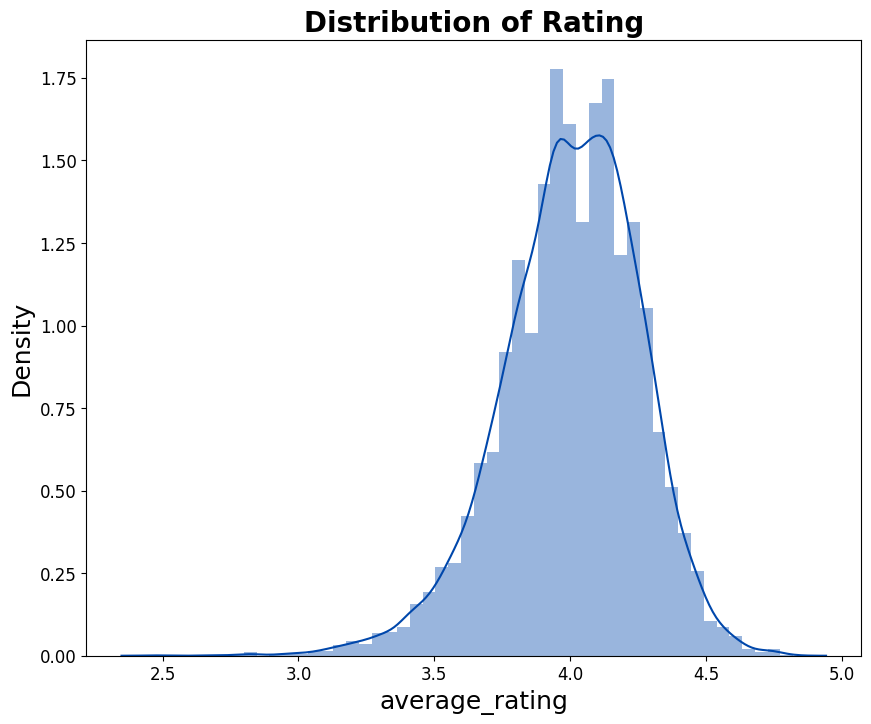

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(books['average_rating'],color='#0047AB')
plt.title('Distribution of Rating',weight='bold',fontsize=20)
plt.xlabel('average_rating',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
books.describe()

,book_id,year,pages,average_rating,ratings_count,books_count
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,1982.04,359.25,4.00,54001.24,75.71
std,2886.90,152.42,216.17,0.25,157369.96,170.47
min,1.00,-1750.00,0.00,2.47,2716.00,1.00
25%,2500.75,1990.00,251.00,3.85,13568.75,23.00
50%,5000.50,2004.00,336.00,4.02,21155.50,40.00
75%,7500.25,2011.00,422.00,4.18,41053.50,67.00
max,10000.00,2017.00,5216.00,4.82,4780653.00,3455.00


### **How is the average rating per user distributed?**

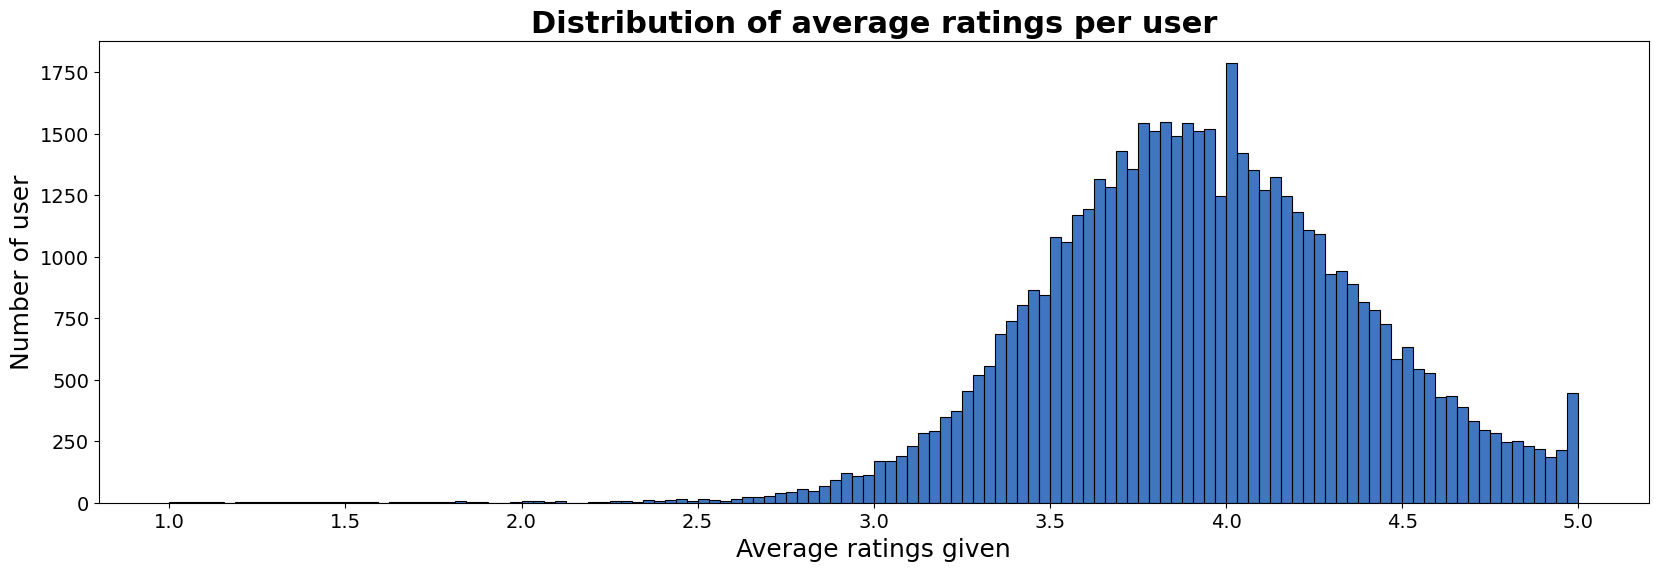

In [ ]:
av_rating_user = r.groupby('user_id')['rating'].mean().reset_index()

plt.figure(figsize=(20,6))
sns.histplot(data=av_rating_user, x='rating', color='#0047AB')
plt.title('Distribution of average ratings per user', weight='bold', fontsize=22)
plt.xlabel('Average ratings given', fontsize=18)
plt.ylabel('Number of user', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### **How many ratings does a book usually get?**

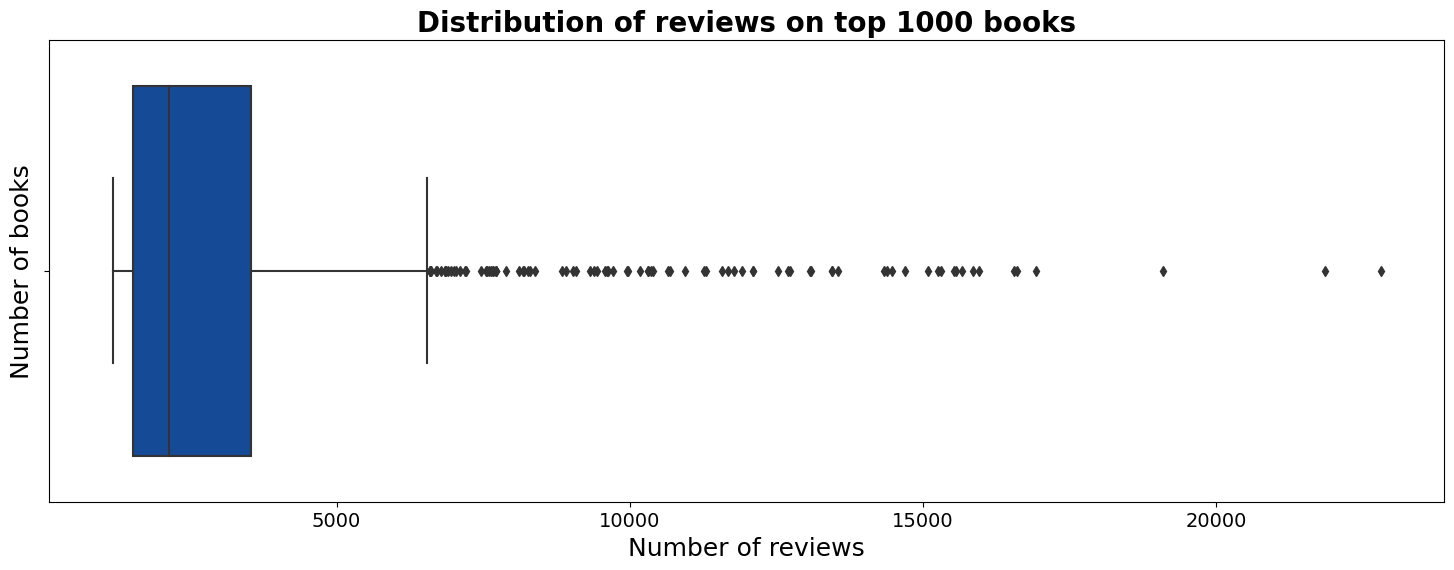

In [ ]:
ratings_per_book = (r.groupby('book_id')['rating'].count().reset_index()).sort_values(by='rating', ascending=False)


plt.figure(figsize=(18,6))
sns.boxplot(data=ratings_per_book.head(1000), x='rating', color = '#0047AB')
plt.title('Distribution of reviews on top 1000 books', weight='bold', fontsize=20)
plt.xlabel('Number of reviews', fontsize=18)
plt.ylabel('Number of books', fontsize=18)
plt.xticks(fontsize=14)
plt.show()


In [ ]:
ratings_per_book['rating'].describe()

count   10000.00
mean      597.65
std      1267.29
min         8.00
25%       155.00
50%       248.00
75%       503.00
max     22806.00
Name: rating, dtype: float64

In [ ]:
q3, q1 = np.percentile(ratings_per_book, [75 ,25])
iqr = q3 - q1
maximum = q3 + (1.5 * iqr)
outlier_books = len(ratings_per_book[ratings_per_book['rating'] > maximum])
print(f'We have {outlier_books} books that are considered outlier, because they have more than {int(maximum)} number of ratings')

We have 26 books that are considered outlier, because they have more than 12515 number of ratings


### **How many ratings does a user generally give?**

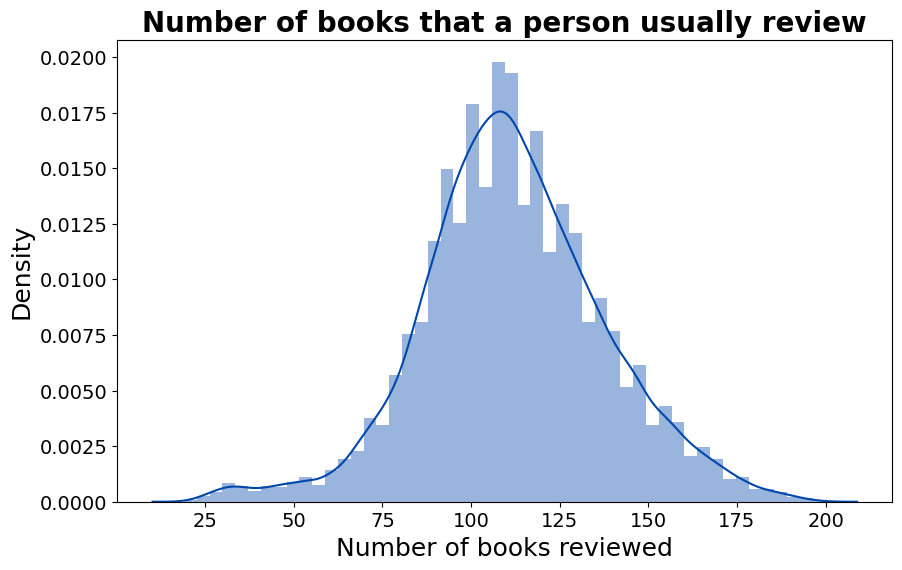

In [ ]:
book_per_user = r.groupby('user_id')['rating'].count().reset_index()

plt.figure(figsize=(10,6))
sns.distplot(book_per_user['rating'], color='#0047AB')
plt.title('Number of books that a person usually review', weight='bold', fontsize=20)
plt.xlabel('Number of books reviewed', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [ ]:
book_per_user['rating'].describe()

count   53424.00
mean      111.87
std        26.07
min        19.00
25%        96.00
50%       111.00
75%       128.00
max       200.00
Name: rating, dtype: float64

In [ ]:
book_per_user[book_per_user['rating'] == book_per_user['rating'].max()]['user_id'].values

array([12874, 30944])

### **Does the ratings count affect average rating**

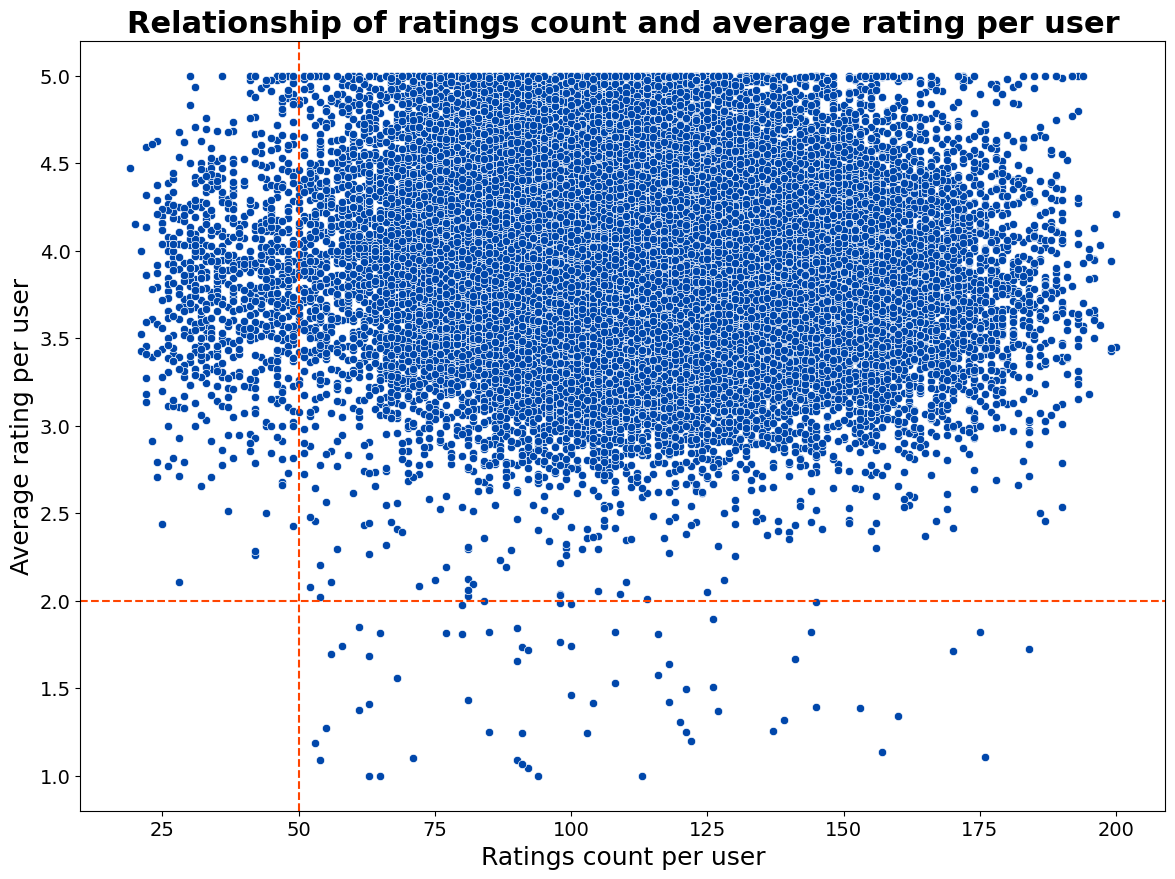

In [ ]:
id_merged = av_rating_user.merge(book_per_user, left_on="user_id", right_on="user_id")

#visualize
plt.figure(figsize=(14,10))
sns.scatterplot(x=id_merged['rating_y'], y=id_merged['rating_x'], color='#0047AB')
plt.title('Relationship of ratings count and average rating per user', weight='bold', fontsize=22)
plt.xlabel('Ratings count per user', fontsize=18)
plt.ylabel('Average rating per user', fontsize=18)
plt.axhline(y = 2, color = 'orangered', linestyle = '--')
plt.axvline(x = 50, color = 'orangered', linestyle = '--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
book_sorted_ratings = books.sort_values('average_rating', ascending=False)
book_sorted_ratings.head(10)

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
3353,3628,The Complete Calvin and Hobbes,Bill Watterson,2005,1456,box set book one book two book three c...,"comics, graphicnovels, fiction, classics",4.82,28900,14
3043,3275,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",2003,2690,box set containing harry potter and the sorcer...,"fantasy, youngadult, fiction, classics",4.77,33220,11
810,862,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,2014,1087,words of radiance book two of the stormlight a...,"fantasy, fiction",4.77,73572,34
6779,7947,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002,2750,the esv study bible was designed to help you u...,"christian, nonfiction, religion, classics, his...",4.76,8953,96
7403,8854,Mark of the Lion Trilogy,Francine Rivers,1993,1468,this bestselling trilogy chronicles a tale of ...,"christian, historicalfiction, fiction, romance...",4.76,9081,6
4068,4483,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996,176,when cartoonist bill watterson announced that ...,"comics, graphicnovels, fiction",4.75,22351,21
387,422,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,1998,4100,over 4000 pages of harry potter and his world ...,"fantasy, youngadult, fiction, classics",4.74,190050,76
5593,6361,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,1996,176,in the world that calvin and his stuffed tiger...,"comics, fiction, graphicnovels",4.74,16766,22
5767,6590,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,1990,254,a collection of calvin and hobbes cartoons the...,"comics, graphicnovels, fiction, classics",4.73,16087,21
3457,3753,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005,3342,six years of magic adventure and mystery make ...,"fantasy, fiction, youngadult, classics",4.73,24618,6


In [ ]:
book_sorted_ratings_count = books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count.head(10)

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008,374,winning means fame and fortunelosing means cer...,"youngadult, fiction, fantasy, sciencefiction, ...",4.34,4780653,272
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997,309,harry potters life is miserable his parents ar...,"fantasy, fiction, youngadult, classics",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",Stephenie Meyer,2005,501,about three things i was absolutely positive ...,"youngadult, fantasy, romance, fiction, paranormal",3.57,3866839,226
3,4,To Kill a Mockingbird,Harper Lee,1960,324,the unforgettable novel of a childhood in a sl...,"classics, fiction, historicalfiction, youngadult",4.25,3198671,487
4,5,The Great Gatsby,F. Scott Fitzgerald,1925,200,alternate cover edition isbn isbn13 the great...,"classics, fiction, historicalfiction, romance",3.89,2683664,1356
5,6,The Fault in Our Stars,John Green,2012,313,despite the tumorshrinking medical miracle tha...,"youngadult, romance, fiction, contemporary",4.26,2346404,226
6,7,The Hobbit,J.R.R. Tolkien,1937,366,in a hole in the ground there lived a hobbit n...,"fantasy, classics, fiction, youngadult",4.25,2071616,969
7,8,The Catcher in the Rye,J.D. Salinger,1951,277,the heronarrator of the catcher in the rye is ...,"classics, fiction, youngadult",3.79,2044241,360
9,10,Pride and Prejudice,Jane Austen,1813,279,alternate cover edition of isbn since its imme...,"classics, fiction, romance, historicalfiction",4.24,2035490,3455
8,9,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2000,736,worldrenowned harvard symbologist robert langd...,"fiction, mystery, thriller, suspense, crime, h...",3.85,2001311,311


### **How is the relationship between the number of ratings and the average rating?**

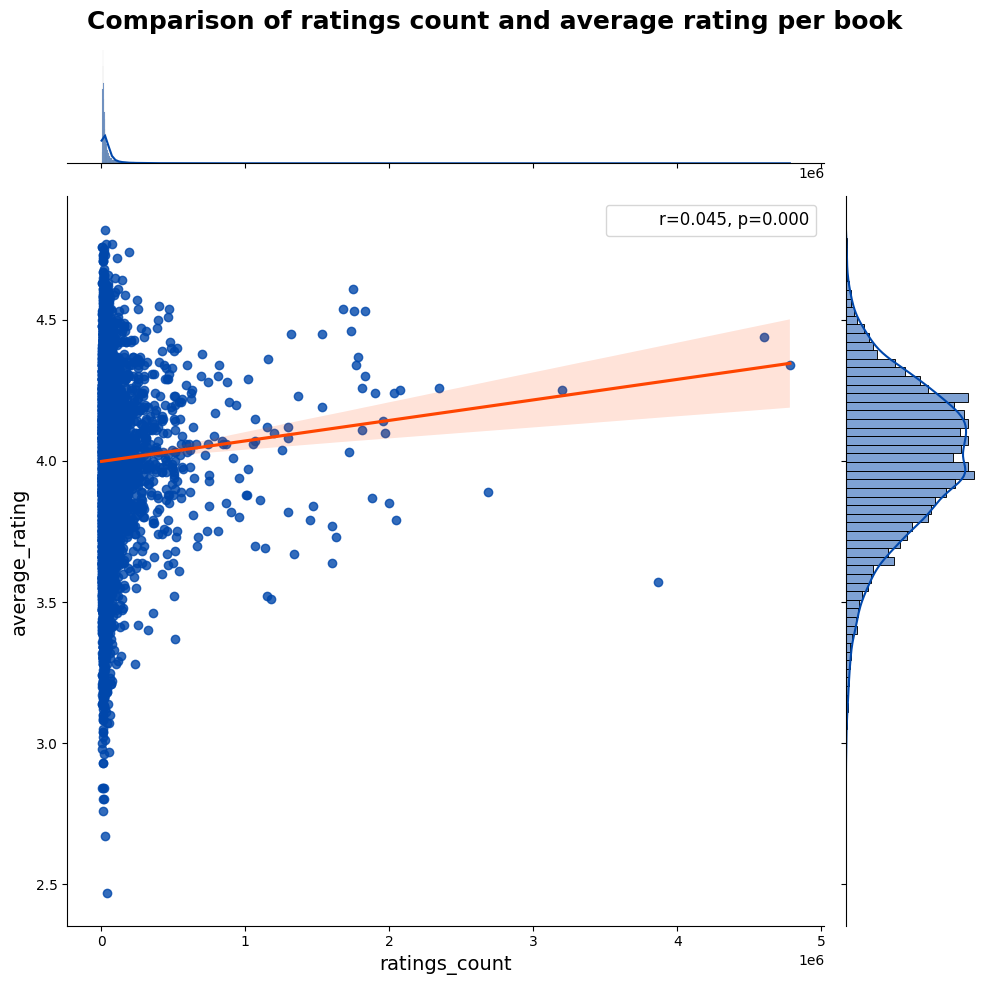

In [ ]:
x=books['ratings_count']
y=books['average_rating']
j=sns.jointplot(x=books['ratings_count'],y=books['average_rating'],height=10,kind='reg',color='#0047AB',
                  line_kws={'color':'orangered'})
r, p = stats.pearsonr(x, y)

phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:.3f}, p={:.3f}'.format(r,p)], fontsize=12)

j.fig.suptitle('Comparison of ratings count and average rating per book', weight='bold', fontsize=18)
j.set_axis_labels('ratings_count', 'average_rating', fontsize=14)

# labels appear outside of plot area, so auto-adjust
j.figure.tight_layout()

plt.show()

### **Who is the author with most books?**

In [ ]:
author_book_count = books.groupby('authors')['title'].count().sort_values(ascending = False)
author_book_count.head()

authors
Stephen King       60
Nora Roberts       59
Dean Koontz        46
Terry Pratchett    42
Agatha Christie    39
Name: title, dtype: int64

In [ ]:
auth = []
books.authors.apply(lambda x: auth.append(x) if 'Stephen King' in x else [])
auth[:5]

['Stephen King',
 'Stephen King, Bernie Wrightson',
 'Stephen King',
 'Stephen King',
 'Stephen King']

In [ ]:
prev_count = books.authors.value_counts()['Stephen King']
print(f'Number of books written by Stephen King was {len(auth)} not {prev_count}.')

Number of books written by Stephen King was 97 not 60.


In [ ]:
#split authors in each books
a = []
books.authors.apply(lambda x: a.append(x) if ',' in x else [])
a[:5]

['J.K. Rowling, Mary GrandPré',
 'Anne Frank, Eleanor Roosevelt, B.M. MooyaartDoubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré']

In [ ]:
#insert splitted author list in every row
authors_list = books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0                  Suzanne Collins
1    [J.K. Rowling, Mary GrandPré]
2                  Stephenie Meyer
3                       Harper Lee
4              F. Scott Fitzgerald
Name: authors, dtype: object

In [ ]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [ ]:
books = books.drop('authors', axis=1).join(splitted_authors)

In [ ]:
books = books.drop_duplicates(subset='book_id', keep='first')

In [ ]:
book_count_real=books['authors'].value_counts()
book_count_real.head()

James Patterson    96
Stephen King       80
Nora Roberts       63
Dean Koontz        51
Terry Pratchett    48
Name: authors, dtype: int64

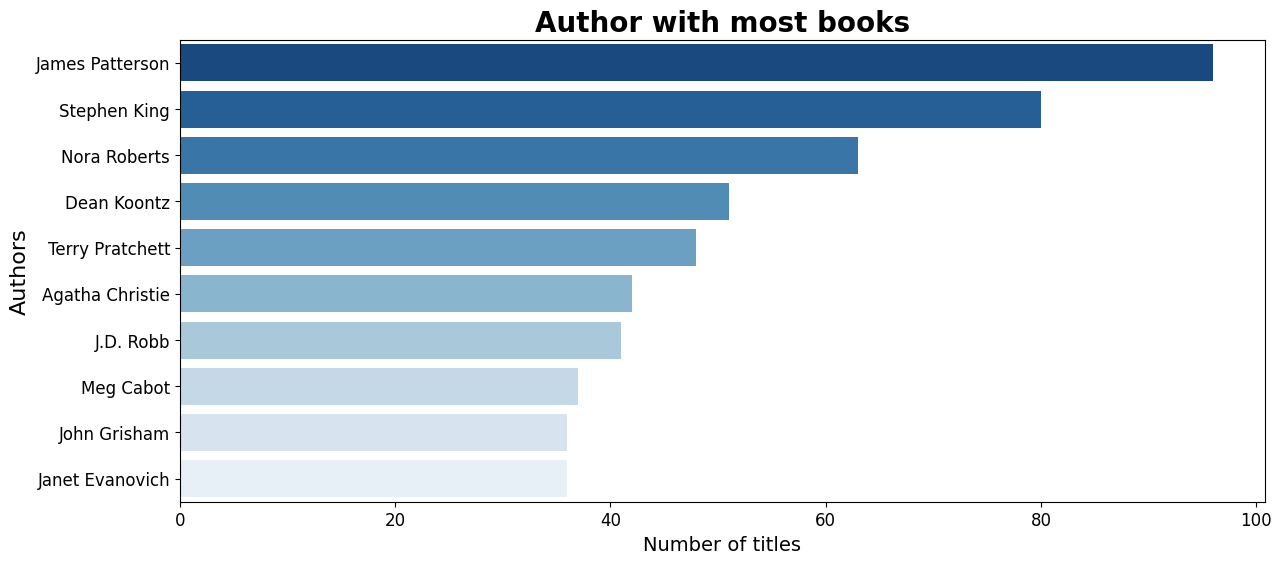

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=book_count_real.head(10).values,
            y=book_count_real.head(10).index,
           palette = 'Blues_r')
plt.title('Author with most books', weight='bold', fontsize=20)
plt.xlabel('Number of titles', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### **Who is the most popular author?**

In [ ]:
popular_author = books.groupby('authors')['ratings_count'].sum().sort_values(ascending = False)
popular_author.head(5)

authors
J.K. Rowling       16036005
Suzanne Collins     8646393
Stephenie Meyer     8512437
Stephen King        8250167
J.R.R. Tolkien      5454844
Name: ratings_count, dtype: int64

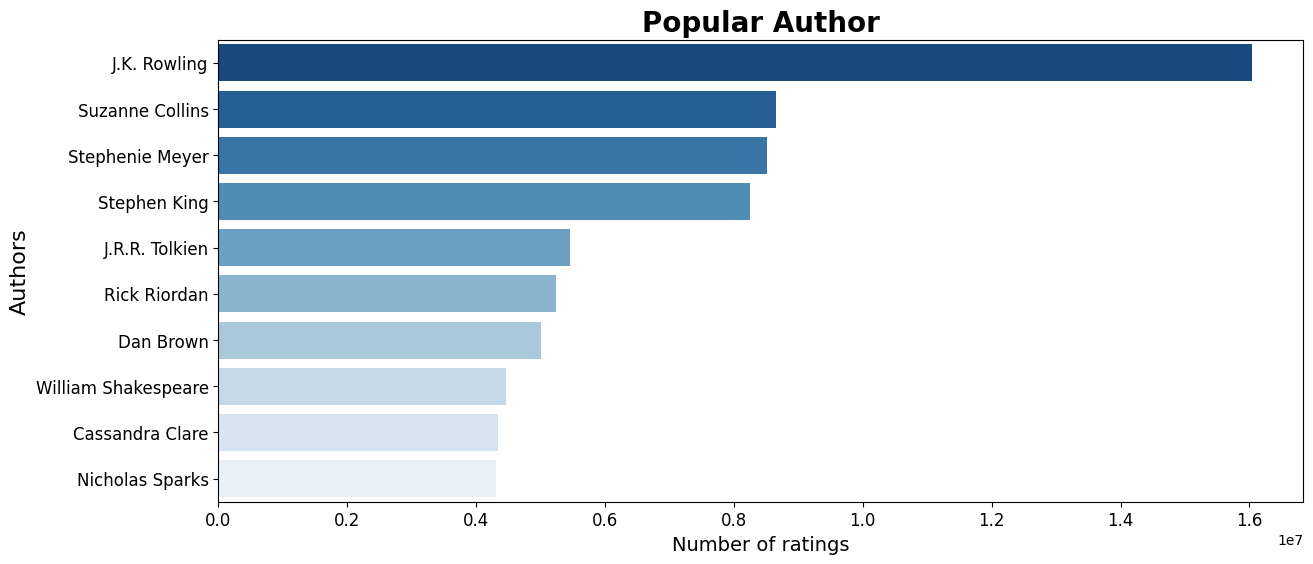

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=popular_author.head(10).values,
            y=popular_author.head(10).index,
           palette = 'Blues_r')
plt.title('Popular Author', weight='bold', fontsize=20)
plt.xlabel('Number of ratings', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### **Who is the author that has good ratings book?**

In [ ]:
high_rating_author = books.groupby('authors')['average_rating'].mean().sort_values(ascending = False)
high_rating_author.head(5)

authors
Bill Watterson     4.70
Hafez              4.63
James E. Talmage   4.63
Eiichiro Oda       4.63
Angie Thomas       4.62
Name: average_rating, dtype: float64

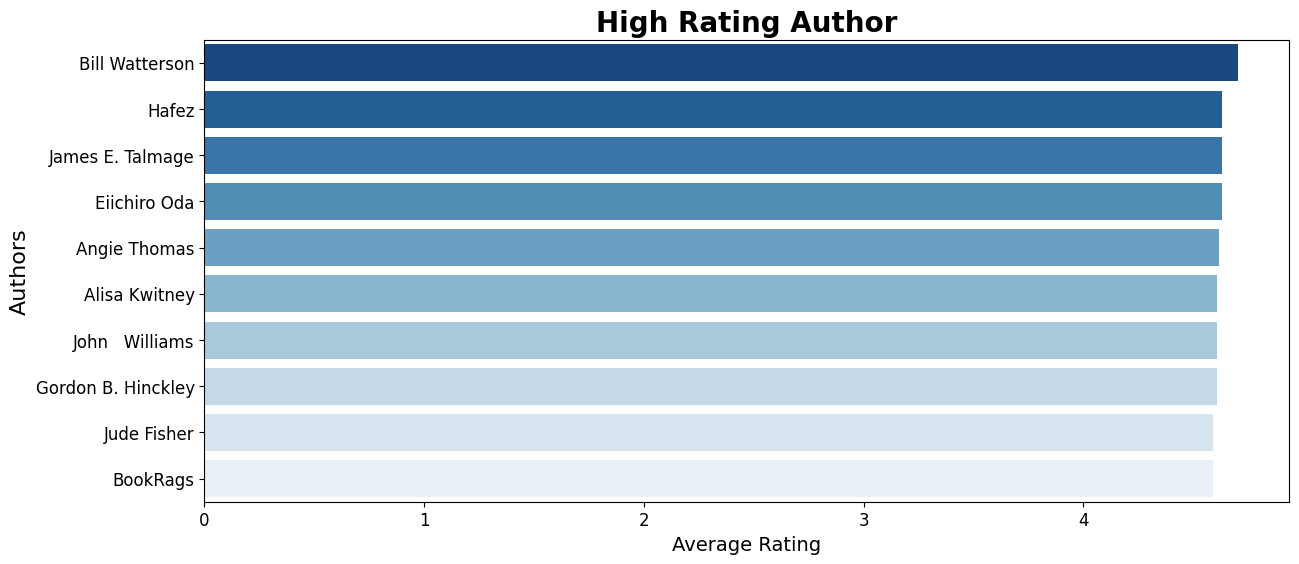

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=high_rating_author.head(10).values,
            y=high_rating_author.head(10).index,
           palette = 'Blues_r')
plt.title('High Rating Author', weight='bold', fontsize=20)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

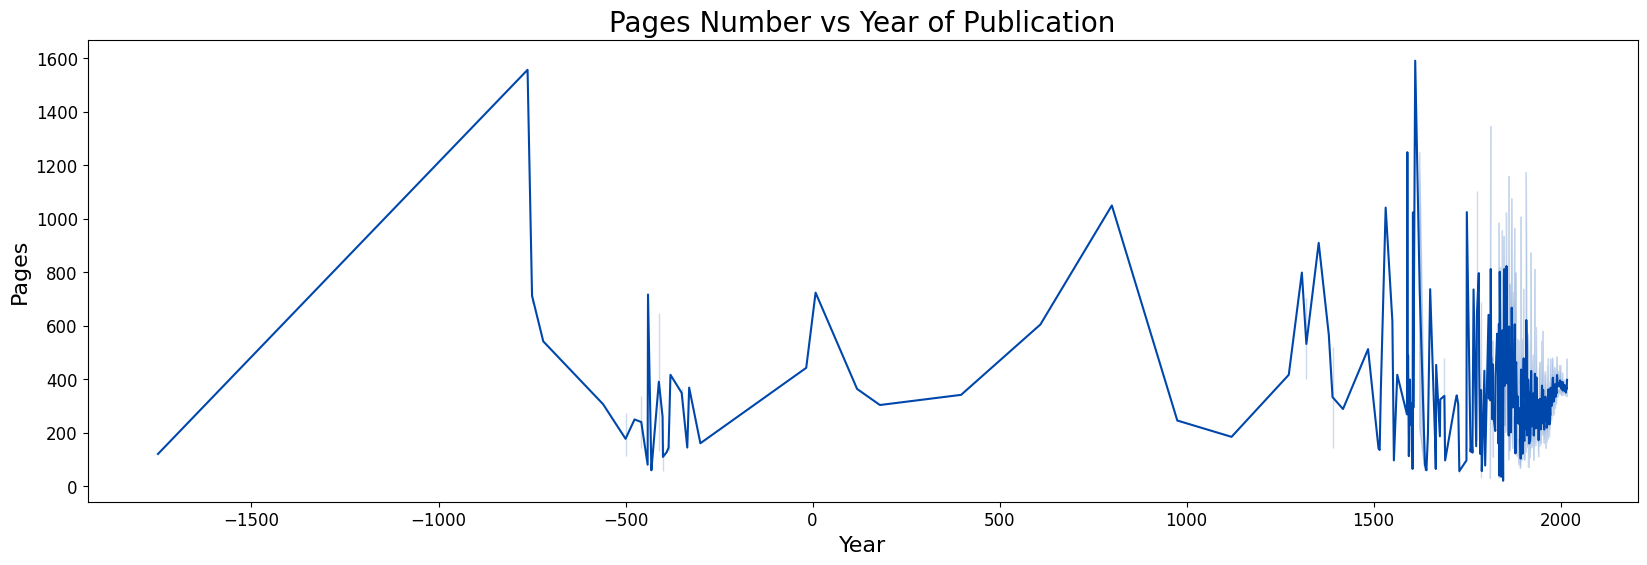

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'year', y = 'pages', data = books, color='#0047AB')
plt.title('Pages Number vs Year of Publication', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
books_after_1800 = books[books['year'] > 1800]

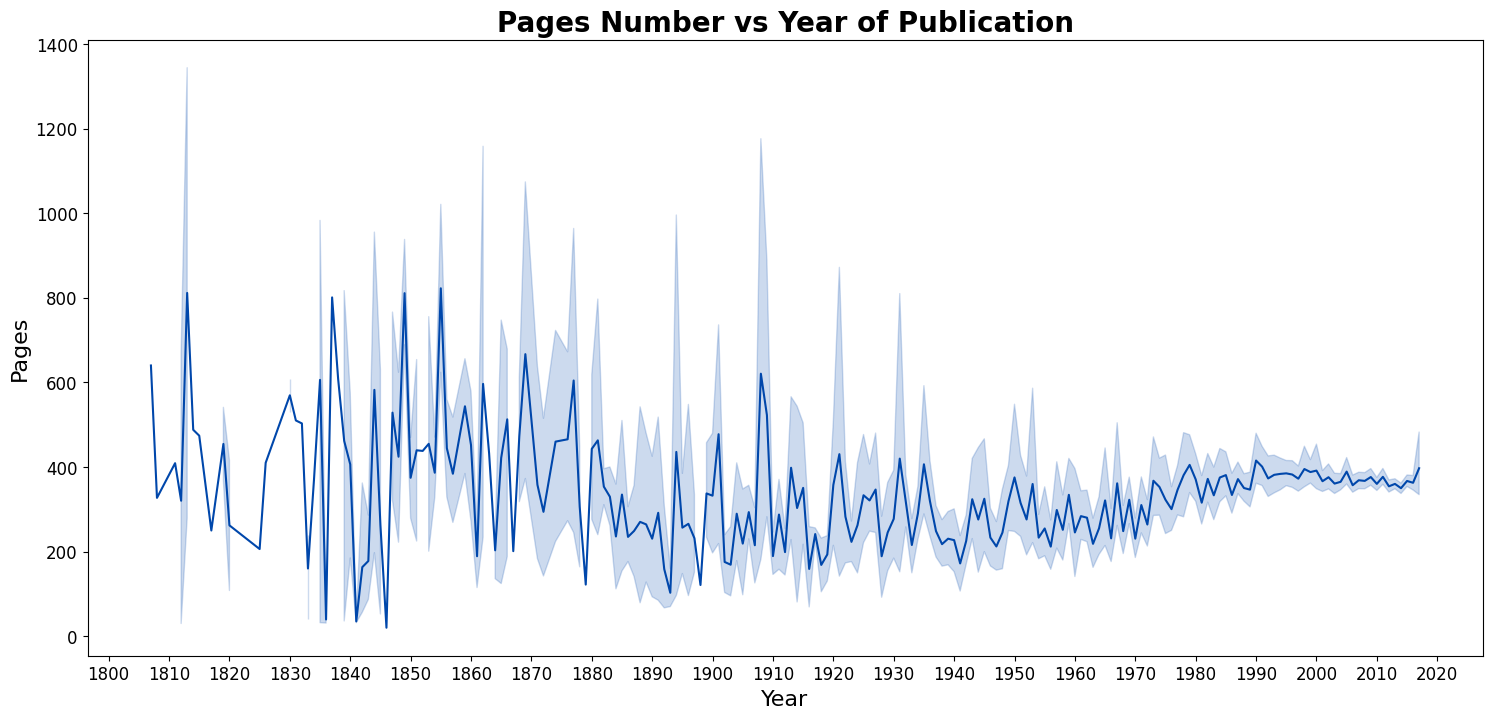

In [ ]:
plt.figure(figsize = (18,8))
sns.lineplot(x = 'year', y = 'pages', data = books_after_1800, color='#0047AB')
plt.title('Pages Number vs Year of Publication', weight='bold', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(np.arange(1800, 2021, 10), fontsize=12)
plt.yticks(np.arange(0, 1401, 200), fontsize=12)
plt.show()

### **What genre dominates the dataset?**

In [ ]:
g = []
books.genres.apply(lambda x: g.append(x) if ',' in x else [])
g[:5]

['youngadult, fiction, fantasy, sciencefiction, romance',
 'fantasy, fiction, youngadult, classics',
 'youngadult, fantasy, romance, fiction, paranormal',
 'classics, fiction, historicalfiction, youngadult',
 'classics, fiction, historicalfiction, romance']

In [ ]:
genres_list = books['genres'].apply(lambda x: [g for g in x.split(', ')] if ',' in x else x)
genres_list.head()

0    [youngadult, fiction, fantasy, sciencefiction,...
1             [fantasy, fiction, youngadult, classics]
2    [youngadult, fantasy, romance, fiction, parano...
3    [classics, fiction, historicalfiction, youngad...
4      [classics, fiction, historicalfiction, romance]
Name: genres, dtype: object

In [ ]:
splitted_genres = genres_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_genres.name = 'genres'
splitted_genres.head()

0        youngadult
0           fiction
0           fantasy
0    sciencefiction
0           romance
Name: genres, dtype: object

In [ ]:
book_genres = books.drop('genres', axis=1).join(splitted_genres)

In [ ]:
x = book_genres['genres']
y = book_genres['average_rating']

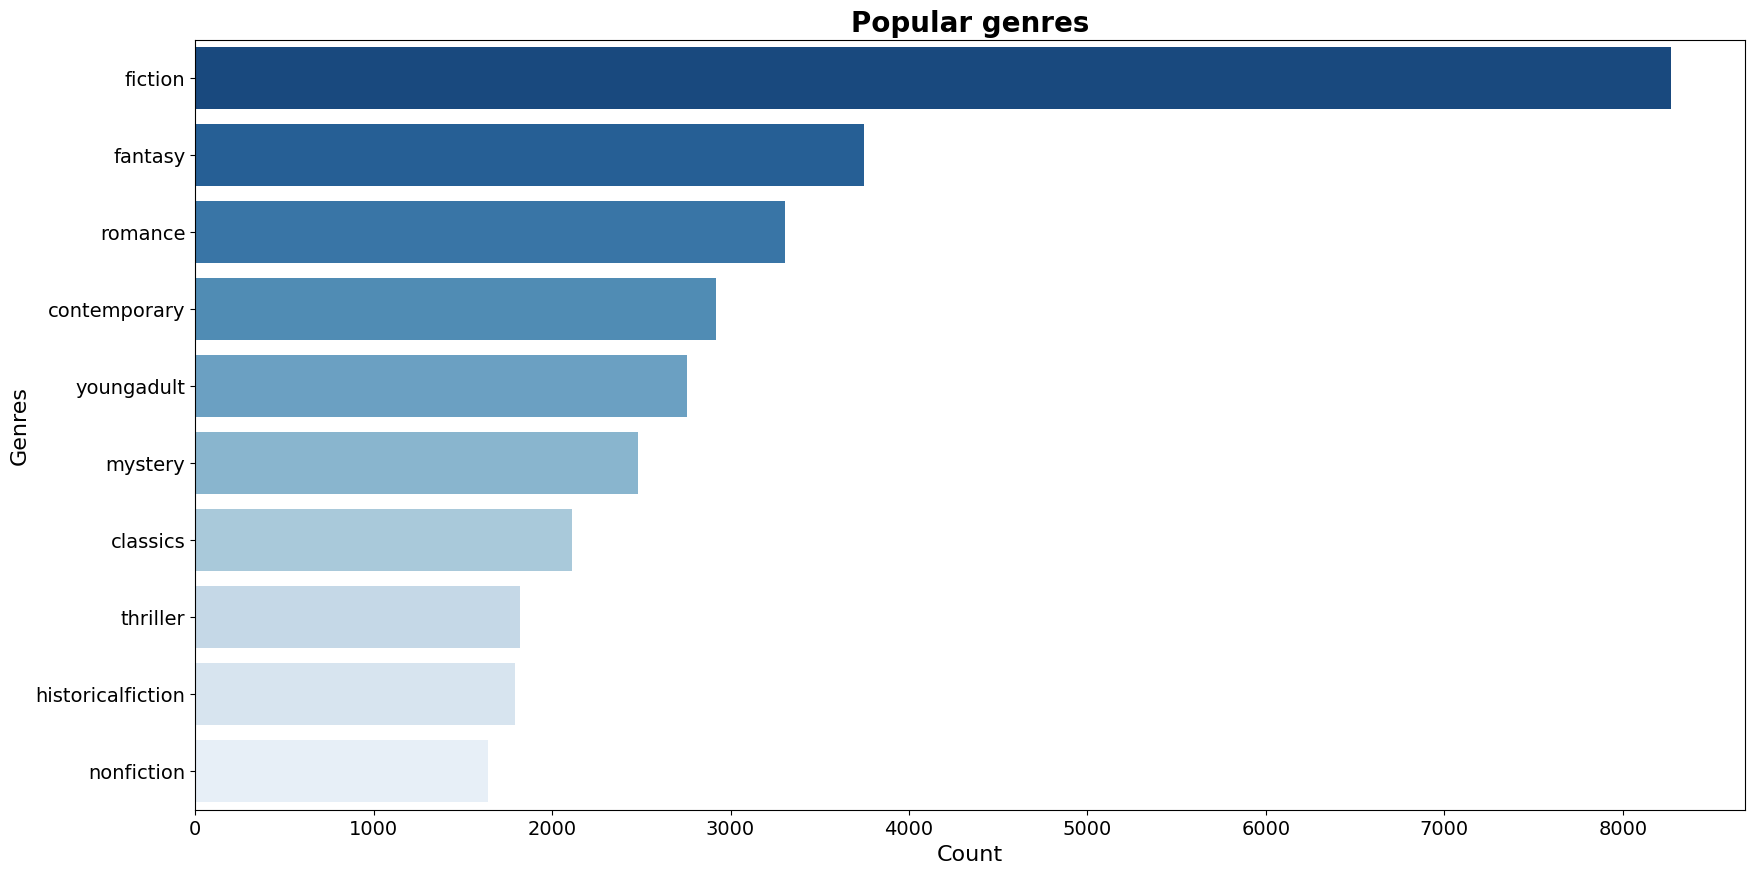

In [ ]:
genres_rank = book_genres.genres.value_counts()

#visualize
plt.figure(figsize=(20,10))
sns.barplot(x=genres_rank.head(10).values,
            y=genres_rank.head(10).index,
            palette = 'Blues_r')
plt.title('Popular genres', weight='bold', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
books.to_csv('/content/sample_data/books_cleaned.csv')